In [1]:
# Importing the data set 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import researchpy as rp
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank_churn = pd.read_csv("Churn Modeling.csv")

### Data Inspection

In [3]:
bank_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
bank_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
bank_churn = bank_churn.drop(['RowNumber','CustomerId','Surname'], axis=1)
bank_churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Correlation 

In [20]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly 

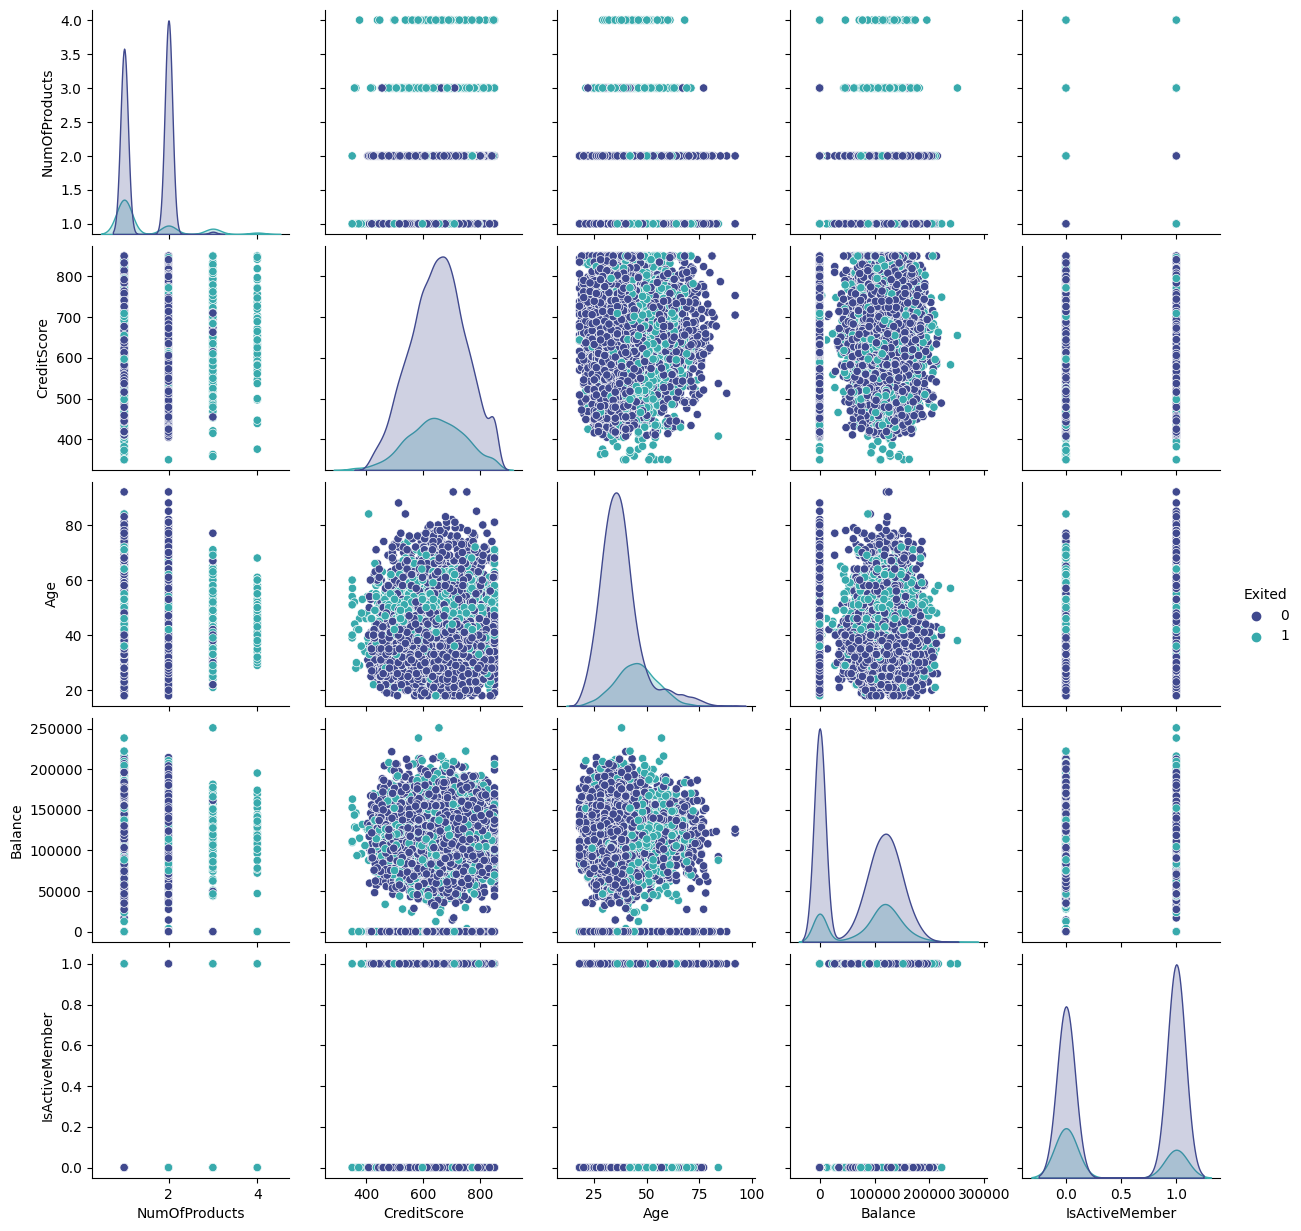

In [19]:
sns.pairplot(bank_churn,vars = ['NumOfProducts',"CreditScore", "Age","Balance",'IsActiveMember'],hue='Exited',palette='mako')
plt.show()

In [38]:
coor=bank_churn[['NumOfProducts',"CreditScore", "Age","Balance",'IsActiveMember','Exited']].corr()

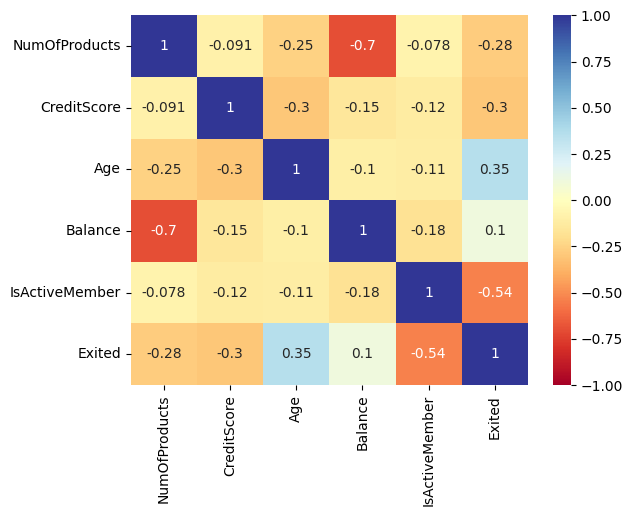

In [39]:
sns.heatmap(coor.corr(),annot=True,cmap="RdYlBu",vmin=-1)
plt.show()

# Two Sample testing

In [41]:
rp.ttest(group1= bank_churn['NumOfProducts'][bank_churn['Exited'] == 1], group1_name= "Exited",
         group2= bank_churn['NumOfProducts'][bank_churn['Exited'] == 0], group2_name= "Didi not exit")

(        Variable        N      Mean        SD        SE  95% Conf.  Interval
 0         Exited   2037.0  1.475209  0.801521  0.017759   1.440381  1.510036
 1  Didi not exit   7963.0  1.544267  0.509536  0.005710   1.533074  1.555460
 2       combined  10000.0  1.530200  0.581654  0.005817   1.518798  1.541602,
                        Independent t-test    results
 0  Difference (Exited - Didi not exit) =     -0.0691
 1                   Degrees of freedom =   9998.0000
 2                                    t =     -4.7870
 3                Two side test p value =      0.0000
 4               Difference < 0 p value =      0.0000
 5               Difference > 0 p value =      1.0000
 6                            Cohen's d =     -0.1189
 7                            Hedge's g =     -0.1188
 8                       Glass's delta1 =     -0.0862
 9                     Point-Biserial r =     -0.0478)

### Inferance
>The mean of the "Exited" group is 1.475, with a standard deviation of 0.802.

>The mean of the "Did not exit" group is 1.544, with a standard deviation of 0.510.

>The mean of the combined sample is 1.530, with a standard deviation of 0.582.

>The independent t-test indicates that there is a significant difference between the mean number of products held by customers who have exited and those who have not (t = -4.787, p < 0.0001).

>The negative t-value indicates that the mean number of products held by customers who have exited is lower than the mean number of products held by customers who have not exited.

>The Cohen's d effect size of -0.119 suggests a small effect size.

>The Point-Biserial r of -0.048 suggests a weak negative correlation between the number of products held and the likelihood of churn.

In [42]:
rp.ttest(group1= bank_churn['CreditScore'][bank_churn['Exited'] == 1], group1_name= "Exited",
         group2= bank_churn['CreditScore'][bank_churn['Exited'] == 0], group2_name= "Didi not exit")

(        Variable        N        Mean          SD        SE   95% Conf.  \
 0         Exited   2037.0  645.351497  100.321503  2.222790  640.992317   
 1  Didi not exit   7963.0  651.853196   95.653837  1.071924  649.751944   
 2       combined  10000.0  650.528800   96.653299  0.966533  648.634201   
 
      Interval  
 0  649.710678  
 1  653.954448  
 2  652.423399  ,
                        Independent t-test    results
 0  Difference (Exited - Didi not exit) =     -6.5017
 1                   Degrees of freedom =   9998.0000
 2                                    t =     -2.7101
 3                Two side test p value =      0.0067
 4               Difference < 0 p value =      0.0034
 5               Difference > 0 p value =      0.9966
 6                            Cohen's d =     -0.0673
 7                            Hedge's g =     -0.0673
 8                       Glass's delta1 =     -0.0648
 9                     Point-Biserial r =     -0.0271)

### Inferance

>The sample sizes for the two groups are 2037 and 7963, respectively, and the overall sample size is 10000.

>The mean balance for the "Exited" group is 645.35, with a standard deviation of 100.32.

>The mean balance for the "Did not exit" group is 651.85, with a standard deviation of 95.65.

>The mean balance for the combined sample is 650.53, with a standard deviation of 96.65.

>The independent t-test indicates that there is a significant difference between the mean balance of customers who have exited and those who have not (t = -2.7101, p = 0.0067).

>The negative t-value indicates that the mean balance of customers who have exited is lower than the mean balance of customers who have not exited.

>The Cohen's d effect size of -0.0673 suggests a small effect size.

>The Point-Biserial r of -0.0271 suggests a weak negative correlation between the account balance and the likelihood of churn.

In [43]:
rp.ttest(group1= bank_churn['Age'][bank_churn['Exited'] == 1], group1_name= "Exited",
         group2= bank_churn['Age'][bank_churn['Exited'] == 0], group2_name= "Didi not exit")

(        Variable        N       Mean         SD        SE  95% Conf.  \
 0         Exited   2037.0  44.837997   9.761562  0.216284  44.413837   
 1  Didi not exit   7963.0  37.408389  10.125363  0.113468  37.185962   
 2       combined  10000.0  38.921800  10.487806  0.104878  38.716218   
 
     Interval  
 0  45.262157  
 1  37.630815  
 2  39.127382  ,
                        Independent t-test    results
 0  Difference (Exited - Didi not exit) =      7.4296
 1                   Degrees of freedom =   9998.0000
 2                                    t =     29.7668
 3                Two side test p value =      0.0000
 4               Difference < 0 p value =      1.0000
 5               Difference > 0 p value =      0.0000
 6                            Cohen's d =      0.7391
 7                            Hedge's g =      0.7390
 8                       Glass's delta1 =      0.7611
 9                     Point-Biserial r =      0.2853)

### Inferance

>'Exited' has a sample size of 2037, a mean of 44.84, a standard deviation of 9.76, and a standard error of 0.22.

>'Did not exit' has a sample size of 7963, a mean of 37.41, a standard deviation of 10.13, and a standard error of 0.11.

>'Combined' has a sample size of 10000, a mean of 38.92, a standard deviation of 10.49, and a standard error of 0.10.

>The 'Independent t-test results' section shows the results of an independent t-test performed on the difference between the means of 'Exited' and 'Did not exit'.

>The test shows that there is a statistically significant difference between the means of the two groups (t = 29.77, p < 0.05).

>The effect size measures Cohen's d, Hedge's g, and Glass's delta1 are all around 0.74, indicating a moderate effect.

>The Point-Biserial correlation coefficient between the two groups is 0.29, indicating a moderate positive correlation.

In [44]:
rp.ttest(group1= bank_churn['Balance'][bank_churn['Exited'] == 1], group1_name= "Exited",
         group2= bank_churn['Balance'][bank_churn['Exited'] == 0], group2_name= "Didi not exit")

(        Variable        N          Mean            SD           SE  \
 0         Exited   2037.0  91108.539337  58360.794816  1293.080860   
 1  Didi not exit   7963.0  72745.296779  62848.040701   704.293021   
 2       combined  10000.0  76485.889288  62397.405202   623.974052   
 
       95% Conf.      Interval  
 0  88572.639892  93644.438783  
 1  71364.697947  74125.895610  
 2  75262.774563  77709.004013  ,
                        Independent t-test     results
 0  Difference (Exited - Didi not exit) =   18363.2426
 1                   Degrees of freedom =    9998.0000
 2                                    t =      11.9362
 3                Two side test p value =       0.0000
 4               Difference < 0 p value =       1.0000
 5               Difference > 0 p value =       0.0000
 6                            Cohen's d =       0.2964
 7                            Hedge's g =       0.2963
 8                       Glass's delta1 =       0.3147
 9                     Point-Bi

### Inferance

>The mean account balance for the Exited group is 91,108.54, and for the Did not exit group, it is 72,745.30.

>The independent t-test result shows that there is a significant difference between the mean account balances of the two groups (p < 0.001), with the Exited group having a higher mean balance of 18,363.24.

>The effect size measures, such as Cohen's d and Hedge's g, indicate a small effect size of 0.296, indicating that the difference between the two groups' means is not substantial.

In [45]:
rp.ttest(group1= bank_churn['IsActiveMember'][bank_churn['Exited'] == 1], group1_name= "Exited",
         group2= bank_churn['IsActiveMember'][bank_churn['Exited'] == 0], group2_name= "Didi not exit")

(        Variable        N      Mean        SD        SE  95% Conf.  Interval
 0         Exited   2037.0  0.360825  0.480358  0.010643   0.339952  0.381697
 1  Didi not exit   7963.0  0.554565  0.497045  0.005570   0.543646  0.565484
 2       combined  10000.0  0.515100  0.499797  0.004998   0.505303  0.524897,
                        Independent t-test    results
 0  Difference (Exited - Didi not exit) =     -0.1937
 1                   Degrees of freedom =   9998.0000
 2                                    t =    -15.8051
 3                Two side test p value =      0.0000
 4               Difference < 0 p value =      0.0000
 5               Difference > 0 p value =      1.0000
 6                            Cohen's d =     -0.3924
 7                            Hedge's g =     -0.3924
 8                       Glass's delta1 =     -0.4033
 9                     Point-Biserial r =     -0.1561)

### Inferance

>The mean proportion of customers who exited is 0.360825, while the mean proportion of customers who did not exit is 0.554565.

>The t-test results suggest that there is a significant difference in the proportion of customers who exited and those who did not exit (p < 0.0001). The negative difference (Exited - Didi not exit = -0.1937) indicates that a smaller proportion of customers exited compared to those who did not exit.

>The effect size measures (Cohen's d, Hedge's g, Glass's delta1, and Point-Biserial r) suggest that the difference in proportions is moderate to large (-0.1561 to -0.3924).

# Regression

In [6]:
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  Ordinary Least Squares
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result s

In [21]:
# specify the dependent variable and independent variables for the regression
y = bank_churn['NumOfProducts']
X = bank_churn['Exited']

# run multiple regression
model = sm.OLS(y, X).fit()

# print the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          NumOfProducts   R-squared (uncentered):                   0.165
Model:                            OLS   Adj. R-squared (uncentered):              0.165
Method:                 Least Squares   F-statistic:                              1982.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):                        0.00
Time:                        19:00:34   Log-Likelihood:                         -18214.
No. Observations:               10000   AIC:                                  3.643e+04
Df Residuals:                    9999   BIC:                                  3.644e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Inferance

>The R-squared value of 0.165 indicates that only 16.5% of the variance in the number of products can be explained by whether the customer has exited or not.

>The coefficient for the "Exited" variable is 1.4752, indicating that customers who have exited tend to have 1.4752 more products than those who have not.

>The t-value of 44.519 and the p-value of 0.000 indicate that the relationship between the number of products and whether the customer has exited or not is statistically significant.

>The model does not contain a constant, so R-squared is computed without centering.

>The standard errors assume that the covariance matrix of the errors is correctly specified.

In [22]:
# specify the dependent variable and independent variables for the regression
y = bank_churn['CreditScore']
X = bank_churn['Exited']

# run multiple regression
model = sm.OLS(y, X).fit()

# print the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            CreditScore   R-squared (uncentered):                   0.196
Model:                            OLS   Adj. R-squared (uncentered):              0.196
Method:                 Least Squares   F-statistic:                              2440.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):                        0.00
Time:                        19:53:46   Log-Likelihood:                         -77985.
No. Observations:               10000   AIC:                                  1.560e+05
Df Residuals:                    9999   BIC:                                  1.560e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Inferance

> The coefficient for Exited is 645.3515, which means that for each unit increase in Exited, CreditScore is expected to increase by 645.3515, holding all other variables constant.

> The p-value for the coefficient is less than 0.05, indicating that the relationship between Exited and CreditScore is statistically significant.

>The R-squared value of 0.196 suggests that only 19.6% of the variation in CreditScore can be explained by Exited alone.

>The F-statistic is significant, which means that the overall model is a good fit for the data.

>The standard error for the coefficient is 13.065, which suggests that there is some variability in the relationship between Exited and CreditScore.

>The t-value is 49.394, indicating that the coefficient is significantly different from zero.
The model does not contain a constant since there is only one independent variable.

In [23]:
# specify the dependent variable and independent variables for the regression
y = bank_churn['Age']
X = bank_churn['Exited']

# run multiple regression
model = sm.OLS(y, X).fit()

# print the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    Age   R-squared (uncentered):                   0.252
Model:                            OLS   Adj. R-squared (uncentered):              0.252
Method:                 Least Squares   F-statistic:                              3369.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):                        0.00
Time:                        19:54:03   Log-Likelihood:                         -49703.
No. Observations:               10000   AIC:                                  9.941e+04
Df Residuals:                    9999   BIC:                                  9.942e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Inferance

>The coefficient of the independent variable (Exited) is 44.8380.

>The standard error of the coefficient is 0.772.

>The t-value for the coefficient is 58.045.

>The p-value for the coefficient is 0.000, which means that the coefficient is statistically significant.

>The R-squared value for the model is 0.252, which means that the independent variable explains 25.2% of the variation in the dependent variable.

>The F-statistic is 3369 and the corresponding p-value is 0.00, which indicates that the model is significant.

>The Omnibus test and Jarque-Bera test suggest that the residuals of the model may not be normally distributed.

>The Durbin-Watson test shows a value of 0.543, which indicates that there may be some autocorrelation in the residuals.

In [25]:
# specify the dependent variable and independent variables for the regression
y = bank_churn['IsActiveMember']
X = bank_churn['Exited']

# run multiple regression
model = sm.OLS(y, X).fit()

# print the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         IsActiveMember   R-squared (uncentered):                   0.051
Model:                            OLS   Adj. R-squared (uncentered):              0.051
Method:                 Least Squares   F-statistic:                              542.8
Date:                Thu, 30 Mar 2023   Prob (F-statistic):                   5.95e-117
Time:                        19:54:40   Log-Likelihood:                         -10608.
No. Observations:               10000   AIC:                                  2.122e+04
Df Residuals:                    9999   BIC:                                  2.123e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Inferance

>The R-squared value of the model is 0.051, indicating that only 5.1% of the variance in "IsActiveMember" can be explained by "Exited".

>The F-statistic of the model is 542.8 with a p-value of 5.95e-117, indicating that the model is statistically significant.

>The coefficient of "Exited" is 0.3608 with a standard error of 0.015. The t-value of the coefficient is 23.297 with a p-value of 0.000, indicating that the coefficient is statistically significant.

>The 95% confidence interval of the coefficient of "Exited" is [0.330, 0.391].

>The model does not contain a constant, so the R-squared value is computed without centering.

>The assumption is made that the covariance matrix of the errors is correctly specified.

# Scatterplot with multiple regression lines

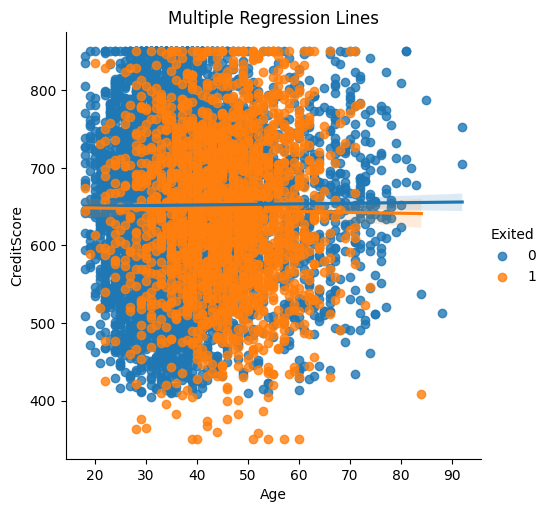

In [58]:
# create scatterplot with multiple regression lines
sns.lmplot(x='Age', y='CreditScore', hue='Exited', data=bank_churn)
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.title('Multiple Regression Lines')
plt.show()

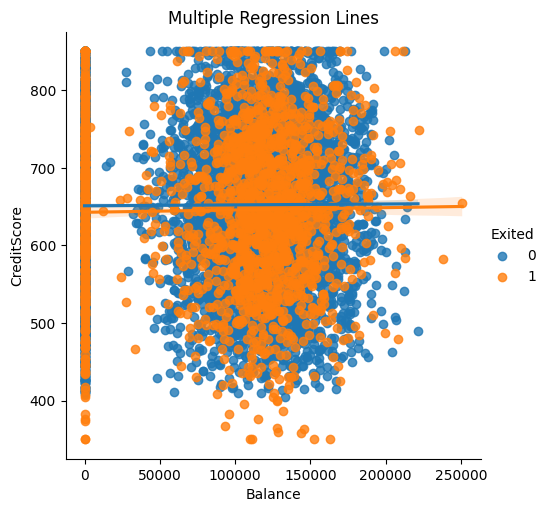

In [54]:
# create scatterplot with multiple regression lines
sns.lmplot(x='Balance', y='CreditScore', hue='Exited', data=bank_churn)
plt.xlabel('Balance')
plt.ylabel('CreditScore')
plt.title('Multiple Regression Lines')
plt.show()

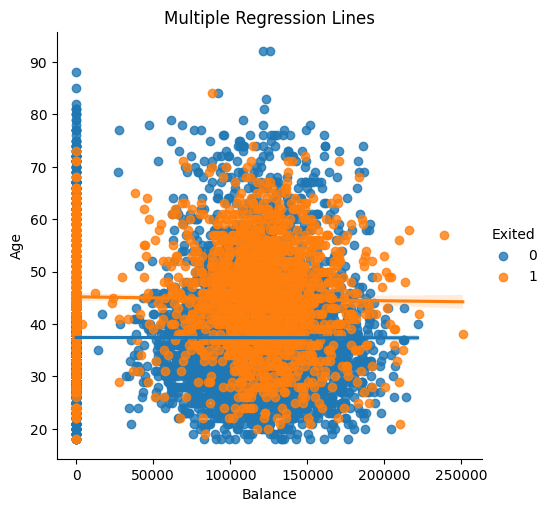

In [55]:
# create scatterplot with multiple regression lines
sns.lmplot(x='Balance', y='Age', hue='Exited', data=bank_churn)
plt.xlabel('Balance')
plt.ylabel('Age')
plt.title('Multiple Regression Lines')
plt.show()